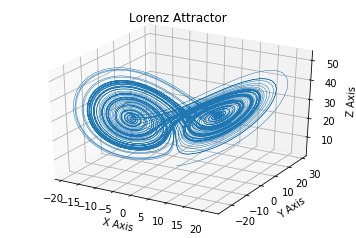

In [1]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
# Note: Because this is a simple non-linear ODE, it would be more easily
#       done using SciPy's ode solver, but this approach depends only
#       upon NumPy.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [26]:
import numpy as np

n = 10
g = 100 #length
dt = 0.02
dx = 1.0
dy = 1.0

h = np.ones((n+2,n+2))
u = np.zeros((n+2,n+2))
v = np.zeros((n+2,n+2))

hx = np.zeros((n+1,n+1))
ux = np.zeros((n+1,n+1))
vx = np.zeros((n+1,n+1))

hy = np.zeros((n+1,n+1))
uy = np.zeros((n+1,n+1))
vy = np.zeros((n+1,n+1))

nsteps = 0
h[1,1] = .5;

def reflective():
    h[:,0] = h[:,1]
    h[:,n+1] = h[:,n]
    h[0,:] = h[1,:]
    h[n+1,:] = h[n,:]
    u[:,0] = u[:,1]
    u[:,n+1] = u[:,n]
    u[0,:] = -u[1,:]
    u[n+1,:] = -u[n,:]
    v[:,0] = -v[:,1]
    v[:,n+1] = -v[:,n]
    v[0,:] = v[1,:]
    v[n+1,:] = v[n,:]

def proses():
    #hx = (h[1:,:]+h[:-1,:])/2-dt/(2*dx)*(u[1:,:]-u[:-1,:])
    for i in range (n+1):
        for j in range(n):
            hx[i,j] = (h[i+1,j+1]+h[i,j+1])/2 - dt/(2*dx)*(u[i+1,j+1]-u[i,j+1])
            ux[i,j] = (u[i+1,j+1]+u[i,j+1])/2- dt/(2*dx)*((pow(u[i+1,j+1],2)/h[i+1,j+1]+ g/2*pow(h[i+1,j+1],2))- (pow(u[i,j+1],2)/h[i,j+1]+ g/2*pow(h[i,j+1],2)))
            vx[i,j] = (v[i+1,j+1]+v[i,j+1])/2 - dt/(2*dx)*((u[i+1,j+1]*v[i+1,j+1]/h[i+1,j+1]) - (u[i,j+1]*v[i,j+1]/h[i,j+1]))

    for i in range (n):
        for j in range(n+1):
            hy[i,j] = (h[i+1,j+1]+h[i+1,j])/2 - dt/(2*dy)*(v[i+1,j+1]-v[i+1,j])
            uy[i,j] = (u[i+1,j+1]+u[i+1,j])/2 - dt/(2*dy)*((v[i+1,j+1]*u[i+1,j+1]/h[i+1,j+1]) - (v[i+1,j]*u[i+1,j]/h[i+1,j]))
            vy[i,j] = (v[i+1,j+1]+v[i+1,j])/2 - dt/(2*dy)*((pow(v[i+1,j+1],2)/h[i+1,j+1] + g/2*pow(h[i+1,j+1],2)) - (pow(v[i+1,j],2)/h[i+1,j] + g/2*pow(h[i+1,j],2)))
    
    for i in range (1,n+1):
        for j in range(1,n+1):
            h[i,j] = h[i,j] - (dt/dx)*(ux[i,j-1]-ux[i-1,j-1]) - (dt/dy)*(vy[i-1,j]-vy[i-1,j-1])
            u[i,j] = u[i,j] - (dt/dx)*((pow(ux[i,j-1],2)/hx[i,j-1] + g/2*pow(hx[i,j-1],2)) - (pow(ux[i-1,j-1],2)/hx[i-1,j-1] + g/2*pow(hx[i-1,j-1],2))) - (dt/dy)*((vy[i-1,j]*uy[i-1,j]/hy[i-1,j]) - (vy[i-1,j-1]*uy[i-1,j-1]/hy[i-1,j-1]))
            v[i,j] = v[i,j] - (dt/dx)*((ux[i,j-1]*vx[i,j-1]/hx[i,j-1]) - (ux[i-1,j-1]*vx[i-1,j-1]/hx[i-1,j-1])) - (dt/dy)*((pow(vy[i-1,j],2)/hy[i-1,j] + g/2*pow(hy[i-1,j],2)) - (pow(vy[i-1,j-1],2)/hy[i-1,j-1] + g/2*pow(hy[i-1,j-1],2)))

#dh = dt/dt*(ux[1:,:]-ux[:-1,:])+ dt/dy*(vy[:,1:]-vy[:,:-1])
    reflective()
    return h,u,v
'''
for i in range (17):
    #print h
    proses(1)
'''

import matplotlib.pyplot as plt
from matplotlib import cm, rc, RcParams
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
a = n
x = np.arange(n+2)
y = np.arange(n+2)
x,y = np.meshgrid(x,y)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

def plotset():
    ax.set_xlim3d(0, a)
    ax.set_ylim3d(0, a)
    ax.set_zlim3d(0.5,1.5)
    ax.set_autoscalez_on(False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    cset = ax.contour(x, y, h, zdir='x', offset=0 , cmap=cm.coolwarm)
    cset = ax.contour(x, y, h, zdir='y', offset=n , cmap=cm.coolwarm)
    cset = ax.contour(x, y, h, zdir='z', offset=.5, cmap=cm.coolwarm)

plotset()

surf = ax.plot_surface(x, y, h,rstride=1, cstride=1,cmap=cm.coolwarm,linewidth=0,antialiased=False, alpha=0.7)

fig.colorbar(surf, shrink=0.5, aspect=5)


from matplotlib import animation


def data(k,h,surf):
    proses()
    ax.clear()
    plotset()
    surf = ax.plot_surface(x, y, h,rstride=1, cstride=1,cmap=cm.coolwarm,linewidth=0,antialiased=False, alpha=0.7)
    return surf,

ani = animation.FuncAnimation(fig, data, fargs=(h,surf), interval=50, blit=True)
# ani.save('air.mp4', bitrate=512)

In [25]:

# RcParams['animation.writer'] = 'avconv'
# rc('animation', html='html5')
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
HTML(ani.to_html5_video())
# ani